In [2]:
import lsdb
import matplotlib.pyplot as plt

from lsdb_macauff.macauff_setup import MacauffSetup
from lsdb_macauff.macauff_crossmatch import MacauffCrossmatch

from distributed import Client

In [3]:
client = Client(n_workers=4, threads_per_worker=1)
client

/Users/smcmu/.pyenv/versions/lsdb-macauff/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 55043 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:55043/status,
Dashboard: http://127.0.0.1:55043/status,Workers: 4
Total threads: 4,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:55044,Workers: 4
Dashboard: http://127.0.0.1:55043/status,Total threads: 4
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:55057,Total threads: 1
Dashboard: http://127.0.0.1:55059/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:55047,


In [4]:
left_cat = lsdb.read_hats("../tests/data/gaia_hats_data")
right_cat = lsdb.read_hats("../tests/data/catwise_hats_data")
macauff_setup = MacauffSetup(
    "../tests/data/gaia_wise_joint_params.yaml",
    "../tests/data/gaia_params.yaml",
    "../tests/data/wise_params.yaml",
)
xmatch = left_cat.crossmatch(right_cat, algorithm=MacauffCrossmatch, macauff_setup=macauff_setup)
xmatch

/Users/smcmu/code/lsdb/src/lsdb/catalog/catalog.py:256: FutureWarning: The default suffix behavior will change from applying suffixes to all columns to only applying suffixes to overlapping columns in a future release.To maintain the current behavior, explicitly set `suffix_method='all_columns'`. To change to the new behavior, set `suffix_method='overlapping_columns'`.
  warnings.warn(


,source_id_gaia_cone,designation_gaia_cone,ra_gaia_cone,dec_gaia_cone,pos_err_gaia_cone,bp_mag_gaia_cone,g_mag_gaia_cone,rp_mag_gaia_cone,bestIndex_gaia_cone,bp_snr_gaia_cone,g_snr_gaia_cone,rp_snr_gaia_cone,pmra_gaia_cone,pmdec_gaia_cone,pm_err_gaia_cone,chunkId_gaia_cone,isOverlap_gaia_cone,cntr_catwise_cone,designation_catwise_cone,ra_catwise_cone,dec_catwise_cone,pos_err_catwise_cone,w1mag_catwise_cone,w2mag_catwise_cone,bestIndex_catwise_cone,w1snr_catwise_cone,w2snr_catwise_cone,chunkId_catwise_cone,isOverlap_catwise_cone,p,eta,xi,a_avg_cont,b_avg_cont,a_cont_f1,a_cont_f10,b_cont_f1,b_cont_f10,sep
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Order: 3, Pixel: 512",int64[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],int64[pyarrow],int64[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow]


In [5]:
res = xmatch.compute()
res

2025-10-23 15:04:13 Rank 0, chunk 0: Creating empirical perturbation AUFs for catalogue "a"...
2025-10-23 15:04:20 Rank 0, chunk 0: Creating perturbation AUFs sky indices for catalogue "a"...
2025-10-23 15:04:20 Rank 0, chunk 0: Creating empirical perturbation AUF PDFs for catalogue "a"...
2025-10-23 15:04:20 Rank 0, chunk 0: Creating perturbation AUFs filter indices for catalogue "a"...
2025-10-23 15:04:20 Rank 0, chunk 0: Creating empirical perturbation AUFs for catalogue "b"...
2025-10-23 15:04:20 Rank 0, chunk 0: Creating perturbation AUFs sky indices for catalogue "b"...
2025-10-23 15:04:20 Rank 0, chunk 0: Creating empirical perturbation AUF PDFs for catalogue "b"...
2025-10-23 15:04:20 Rank 0, chunk 0: Creating perturbation AUFs filter indices for catalogue "b"...
2025-10-23 15:04:20 Rank 0, chunk 0: Creating catalogue islands and overlaps...
2025-10-23 15:04:28 Rank 0, chunk 0: Calculating maximum overlap...
2025-10-23 15:04:37 Rank 0, chunk 0: Truncating star overlaps by AUF i

,source_id_gaia_cone,designation_gaia_cone,ra_gaia_cone,dec_gaia_cone,pos_err_gaia_cone,bp_mag_gaia_cone,g_mag_gaia_cone,rp_mag_gaia_cone,bestIndex_gaia_cone,bp_snr_gaia_cone,g_snr_gaia_cone,rp_snr_gaia_cone,pmra_gaia_cone,pmdec_gaia_cone,pm_err_gaia_cone,chunkId_gaia_cone,isOverlap_gaia_cone,cntr_catwise_cone,designation_catwise_cone,ra_catwise_cone,dec_catwise_cone,pos_err_catwise_cone,w1mag_catwise_cone,w2mag_catwise_cone,bestIndex_catwise_cone,w1snr_catwise_cone,w2snr_catwise_cone,chunkId_catwise_cone,isOverlap_catwise_cone,p,eta,xi,a_avg_cont,b_avg_cont,a_cont_f1,a_cont_f10,b_cont_f1,b_cont_f10,sep
_healpix_29,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2306257182472984125,4612514367296580224,Gaia DR3 4612514367296580224,72.597869,-86.797002,0.000042,17.3707,16.8794,16.232,2,144.39076,1307.3811,280.33557,-0.000282,0.000611,0.000055,0,0,356928489,J045023.54-864749.1,72.598103,-86.796998,0.037827,14.862,14.936,0,68.699997,57.900002,0,0,0.999998,1.712521,4.054503,0.0,0.0,0.0,0.0,0.0,0.0,0.048869
2306257203693513648,4612514401656315904,Gaia DR3 4612514401656315904,72.67584,-86.781434,0.00001,10.5037,9.7688,8.9416,2,1674.9479,5391.4189,4321.9434,-0.001687,0.0212,0.000013,0,0,356929313,J045042.21-864653.1,72.675864,-86.781429,0.022173,7.226,7.027,1,58.700001,103.4,0,0,1.0,3.007561,4.750412,0.0,0.0,0.0,0.0,0.0,0.0,0.019939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2306306355459369026,4612612704868678784,Gaia DR3 4612612704868678784,55.126175,-87.077651,0.001348,18.0049,17.046,15.2413,1,73.022163,52.118095,390.27515,<NA>,<NA>,<NA>,0,0,259638220,J034030.34-870439.6,55.126437,-87.077687,0.040021,12.513,12.381,0,49.599998,65.300003,0,0,0.998519,1.009548,1.819262,0.0,0.0,0.0,0.0,0.0,0.0,0.136925
2306343375641333207,4612686750105095552,Gaia DR3 4612686750105095552,67.637701,-86.670704,0.001103,16.0189,15.9112,14.5054,1,309.30374,97.522934,485.71158,<NA>,<NA>,<NA>,0,0,259479466,J043033.10-864014.4,67.637928,-86.670679,0.023564,12.651,12.698,0,85.699997,108.6,0,0,0.994918,1.684698,0.71853,0.0,0.0,0.0,0.0,0.0,0.0,0.102499


(array([  19.,   24.,   25.,   29.,   29.,   55.,   52.,   93.,  192.,
        7313.]),
 array([0.50191124, 0.55172011, 0.60152899, 0.65133786, 0.70114674,
        0.75095561, 0.80076449, 0.85057336, 0.90038224, 0.95019111,
        0.99999999]),
 <BarContainer object of 10 artists>)

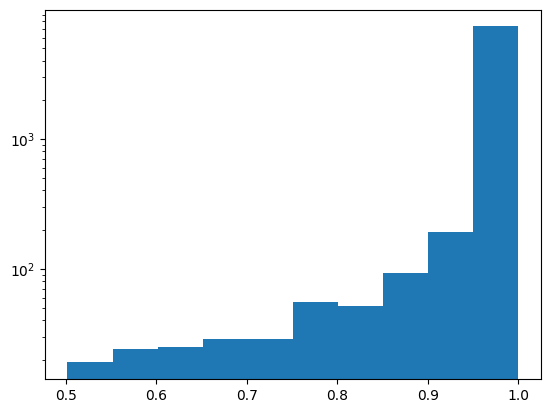

In [6]:
plt.hist(res["p"], log=True)

In [7]:
client.close()